# LeNet
This program includes: 
    - A simple implementation of LeNet (LeCun et al., 1998)
    - A modified version of LeNet with trial/error based improvements

References: 
    - Dive Into Deep Learning, A. Zhang et al
    - Build a Simple Neural Network Using PyTorch, Ramesh Paudel


In [158]:
import torch
from torch import nn
from torchvision.datasets import MNIST
from torchvision import transforms
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [159]:
train_dataset = MNIST(root="./", train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(root="./", train=False, download=True, transform=transforms.ToTensor())

In [160]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [161]:
model = nn.Sequential(
    nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2), 
    nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.LazyLinear(120), nn.Sigmoid(),
    nn.LazyLinear(84), nn.Sigmoid(),
    nn.LazyLinear(10)
    )
print(model)

Sequential(
  (0): LazyConv2d(0, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): LazyConv2d(0, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): LazyLinear(in_features=0, out_features=120, bias=True)
  (8): Sigmoid()
  (9): LazyLinear(in_features=0, out_features=84, bias=True)
  (10): Sigmoid()
  (11): LazyLinear(in_features=0, out_features=10, bias=True)
)


c:\Users\mercu\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [162]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [163]:
losses = []
num_epochs = 1000
for epoch in range(num_epochs):
    print(f"{epoch*100/num_epochs}% Complete", end="\r")
    train_features, train_labels = next(iter(train_dataloader))
    predictions = model(train_features)
    cur_loss = loss_function(predictions, train_labels)
    losses.append(cur_loss.item())

    model.zero_grad()
    cur_loss.backward()

    optimizer.step()
print()

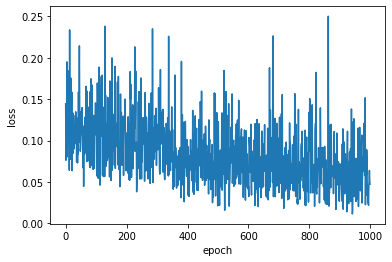

In [ ]:
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
predictions = []
y_test = []

model.eval()
with torch.no_grad():
    for cur_features, cur_labels in test_dataloader:
        y_test.append(cur_labels.numpy()[0])
        prediction_scores = model(cur_features)
        _, cur_predictions = torch.max(prediction_scores.data, 1)
        predictions.append(cur_predictions.item())

In [ ]:
predictions = np.array(predictions).reshape(-1,1)
print(100*np.sum(predictions==y_test)/(y_test.shape[0]))

97.99
